In [1]:
Develop a model to predict customer churn for a subscription-based service or business. 
Use historical customer data, including features like usage behavior and customer demographics, and try 
algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

SyntaxError: invalid syntax (2479732177.py, line 1)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import os

In [4]:
data = pd.read_csv(r'C:/Users/SAEED COMPUTERS/Desktop/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df = data.copy()
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# checking for null values
overview = pd.concat((df.isnull().sum(),df.nunique(),df.dtypes), axis=1, keys=['Null count','cardinality','Data Type'])
display(overview.T)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Null count,0,0,0,0,0,0,0,0,0,0,0
cardinality,460,3,2,70,11,6382,4,2,2,9999,2
Data Type,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64


In [8]:
# checking correlation
df.corrwith(df.Exited).drop(columns = ['Exited']).sort_values(ascending=False)*10000

Exited             10000.000000
Age                 2853.230378
Balance             1185.327688
EstimatedSalary      120.968610
HasCrCard            -71.377656
Tenure              -140.006123
CreditScore         -270.935398
NumOfProducts       -478.198649
IsActiveMember     -1561.282782
dtype: float64

In [9]:
# label encoding for some categorical features
gender_labels = {'Female':0, 'Male':1}
geography_labels = {'France':0, 'Germany':1, 'Spain':2}
df.Gender = df.Gender.map(gender_labels)
df.Geography = df.Geography.map(geography_labels)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


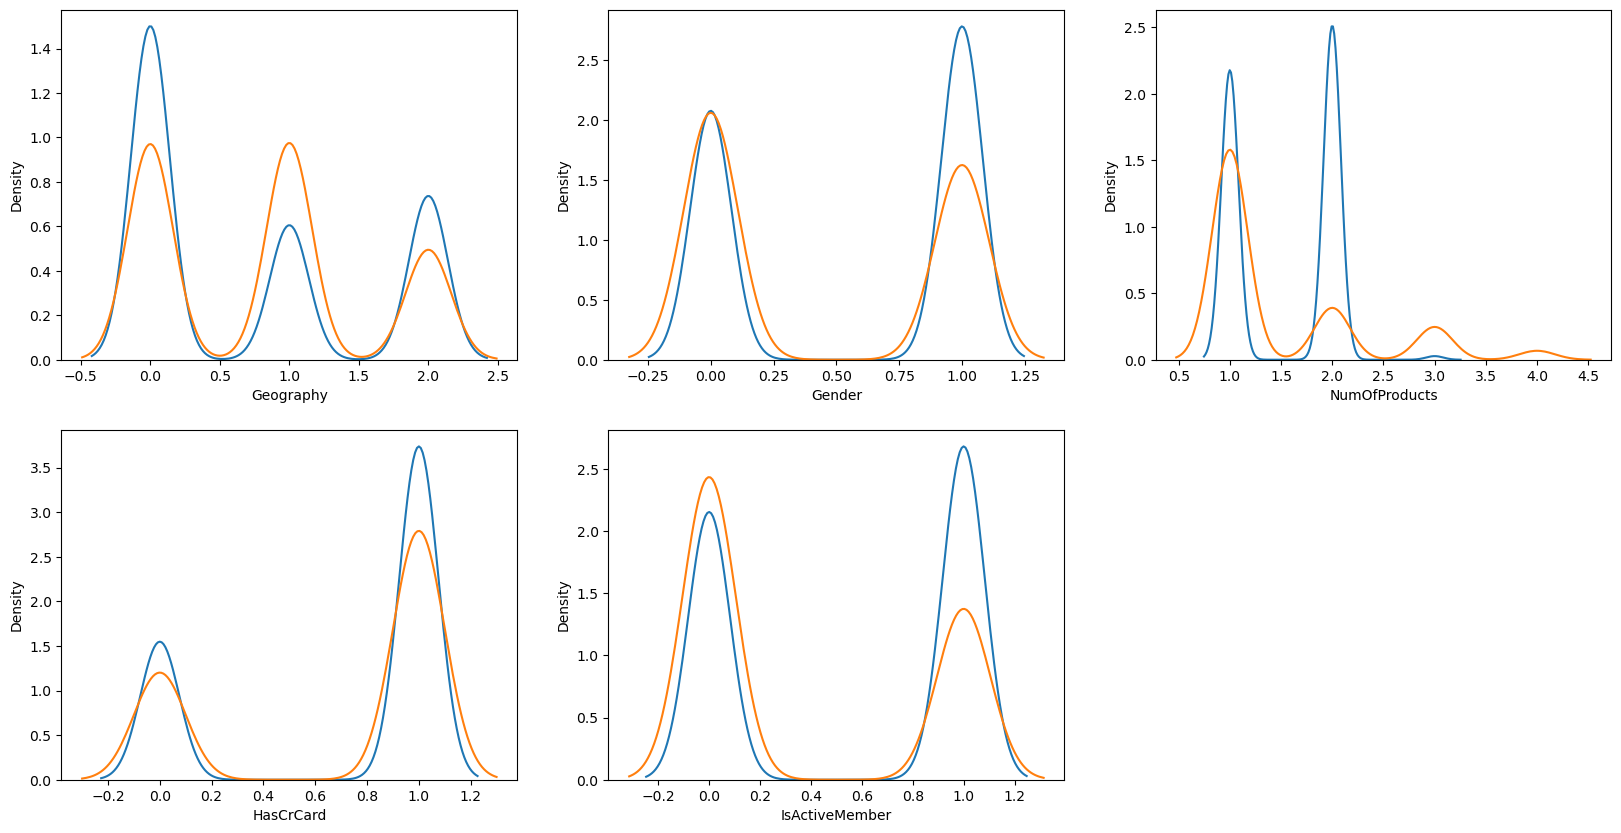

In [11]:
# checking class imbalances for categorical factors
cat = df.columns[df.nunique()<10].tolist()
cat.pop()
print(cat)
plt.figure(figsize=(20,10))
i=1
for factor in cat:
    plt.subplot(2,3,i)
    sns.distplot(df[factor].loc[df['Exited']==0], hist=False)
    sns.distplot(df[factor].loc[df['Exited']==1], hist=False)
    i+=1

In [13]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']).values, df.Exited.values,test_size=0.2, random_state=42)

In [14]:
def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid={
        'Logistic Regression':(LogisticRegression(max_iter=10000),{'C': [0.01, 0.1, 1, 10.0],
                                                                   'solver': ['liblinear','lbfgs','newton-cg']}),
        'KNN':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]}),
        'Decision Tree':(DecisionTreeClassifier(max_depth=10),{'criterion': ['gini','entropy'], 'splitter':['best','random'],
                                                  'max_depth':[10,50,100,150,200,250,300,350,400]}),
        'Random Forest':(RandomForestClassifier(),{'n_estimators':[50,100,150,200]})
    }

    results=[]

    for name, (model,parameters) in model_param_grid.items():
        grid=GridSearchCV(model,parameters)

        print(f"Tuning for {name}")

        st=time.time()

        grid.fit(x_train,y_train) # fitting in GridSearchCV
        y_pred=grid.predict(x_test) # predicts using best hyperparameters
        acc=accuracy_score(y_test,y_pred) # best accuracy obtained

        en=time.time()

        net_time=en-st

        # printing best parameters:
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtined score for {name}: {grid.best_score_*100:.3f}%")
        print(f"Running time for {name}:{net_time:.3f}s")

        results.append([name,grid.best_params_,grid.best_score_*100,net_time])
        print('-'*100)
        print()

    result_df=pd.DataFrame(results, columns=['model_name','best_parameters','best_test_score','running_time'])
    result_df=result_df.style.highlight_max(subset=['best_test_score'], color = 'lightgreen')
    result_df=result_df.highlight_min(subset=['best_test_score'], color = 'pink')
    result_df=result_df.highlight_max(subset=['running_time'], color = 'pink')
    result_df=result_df.highlight_min(subset=['running_time'], color = 'lightgreen')
    return result_df
     


In [15]:
res = result_grid(x_train, y_train, x_test, y_test)
res

Tuning for Logistic Regression
Best hyperparameters for Logistic Regression: {'C': 10.0, 'solver': 'newton-cg'}
Best obtined score for Logistic Regression: 80.625%
Running time for Logistic Regression:31.580s
----------------------------------------------------------------------------------------------------

Tuning for KNN
Best hyperparameters for KNN: {'n_neighbors': 31}
Best obtined score for KNN: 79.450%
Running time for KNN:15.296s
----------------------------------------------------------------------------------------------------

Tuning for Decision Tree
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best obtined score for Decision Tree: 84.050%
Running time for Decision Tree:13.802s
----------------------------------------------------------------------------------------------------

Tuning for Random Forest
Best hyperparameters for Random Forest: {'n_estimators': 150}
Best obtined score for Random Forest: 85.875%
Running tim

,model_name,best_parameters,best_test_score,running_time
0,Logistic Regression,"{'C': 10.0, 'solver': 'newton-cg'}",80.625000,31.579954
1,KNN,{'n_neighbors': 31},79.450000,15.296261
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}",84.050000,13.802439
3,Random Forest,{'n_estimators': 150},85.875000,95.452669
